In [1]:
import pandas as pd
import nltk

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head(10)

,Subject,Message,Spam/Ham
0,transfers from ees,attached is the latest version of the cost cen...,spam
1,fw : re ivanhoe e . s . d,"fyi , kim .\n- - - - - original message - - - ...",spam
2,re : enerfin meter 980439 for 10 / 00,it did but tetco prorated the flow between the...,ham
3,meoh plant status,the methanol plant has determined extensive re...,ham
4,re : tenaska iv,i tried calling you this am but your phone rol...,spam
5,fw : re ivanhoe e . s . d,"fyi , kim .\n- - - - - original message - - - ...",spam
6,fw : memo : re : your work phone number,"hi ,\ni am forwarding an email from a former b...",spam
7,enron mentions,enron replaces fastow as finance chief - - - m...,ham
8,transfers from ees,attached is the latest version of the cost cen...,spam
9,start date : 2 / 6 / 02 ; hourahead hour : 24 ;,start date : 2 / 6 / 02 ; hourahead hour : 24 ...,spam


In [4]:
df_train.dtypes

Subject     object
Message     object
Spam/Ham    object
dtype: object

In [5]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
def pre_process(text):
    text = nltk.word_tokenize(text)
    data = []
    for i in text:
        if i.isalnum() and i not in string.punctuation and i not in stopwords.words('english'):
            i = ps.stem(i)
            data.append(i)
    return " ".join(data)

In [69]:
df_train['newSub'] = df_train['Subject'].apply(pre_process)

In [70]:
df_train[['Subject','newSub']]

,Subject,newSub
0,transfers from ees,transfer ee
1,fw : re ivanhoe e . s . d,fw ivanho e
2,re : enerfin meter 980439 for 10 / 00,enerfin meter 980439 10 00
3,meoh plant status,meoh plant statu
4,re : tenaska iv,tenaska iv
...,...,...
30339,fw : re ivanhoe e . s . d,fw ivanho e
30340,wellheads,wellhead
30341,re : releases,releas
30342,start date : 2 / 6 / 02 ; hourahead hour : 24 ;,start date 2 6 02 hourahead hour 24


In [71]:
df_train['newMessage'] = df_train['Message'].astype(str).apply(pre_process)

In [72]:
df_train[['Message','newMessage']]

,Message,newMessage
0,attached is the latest version of the cost cen...,attach latest version cost center assign trans...
1,"fyi , kim .\n- - - - - original message - - - ...",fyi kim origin messag frazier perri sent thurs...
2,it did but tetco prorated the flow between the...,tetco prorat flow two parti dynegi ena thank d...
3,the methanol plant has determined extensive re...,methanol plant determin extens repair need inc...
4,i tried calling you this am but your phone rol...,tri call phone roll someon els voicemail call ...
...,...,...
30339,"fyi , kim .\n- - - - - original message - - - ...",fyi kim origin messag frazier perri sent thurs...
30340,shoreline has sent in a nom change for the 11 ...,shorelin sent nom chang 11 th ga day take mete...
30341,"louise ,\nthanks so much for your speedy reply...",louis thank much speedi repli pass comment dav...
30342,start date : 2 / 6 / 02 ; hourahead hour : 24 ...,start date 2 6 02 hourahead hour 24 ancillari ...


In [107]:
df_train.to_csv('ProcessedTrain.csv')

In [73]:
from wordcloud import WordCloud

In [74]:
wc = WordCloud(width =500,height= 500,min_font_size = 10,background_color='white')

In [89]:
df_train[df_train['Spam/Ham']=='spam']['newMessage']

0        attach latest version cost center assign trans...
1        fyi kim origin messag frazier perri sent thurs...
4        tri call phone roll someon els voicemail call ...
5        fyi kim origin messag frazier perri sent thurs...
6        hi forward email former bnp pariba colleagu mi...
                               ...                        
30338    hi forward email former bnp pariba colleagu mi...
30339    fyi kim origin messag frazier perri sent thurs...
30341    louis thank much speedi repli pass comment dav...
30342    start date 2 6 02 hourahead hour 24 ancillari ...
30343    louis thank much speedi repli pass comment dav...
Name: newMessage, Length: 15423, dtype: object

In [92]:
spam_msg = wc.generate(df_train[df_train['Spam/Ham']=='spam']['newMessage'].str.cat(sep=' ')) 

In [93]:
spam_sub = wc.generate(df_train[df_train['Spam/Ham']=='spam']['newSub'].str.cat(sep=' '))

In [94]:
ham_msg = wc.generate(df_train[df_train['Spam/Ham']=='ham']['newMessage'].str.cat(sep=' '))  

In [95]:
ham_sub = spam_sub = wc.generate(df_train[df_train['Spam/Ham']=='ham']['newSub'].str.cat(sep=' '))

In [97]:
import matplotlib.pyplot as plt

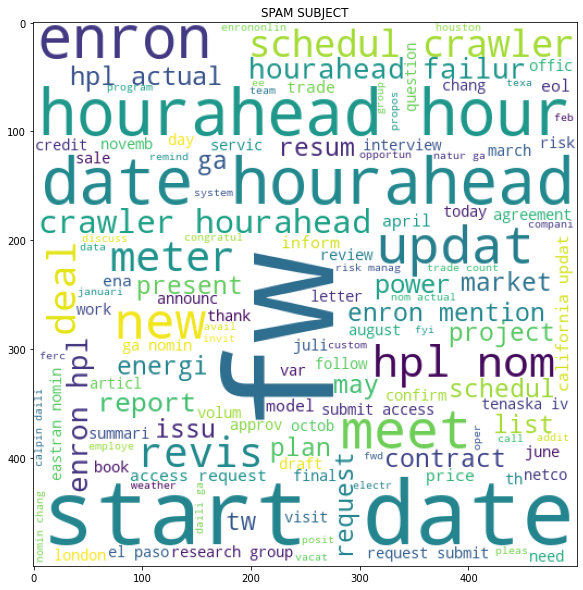

In [108]:
plt.figure(figsize=(10,10))
plt.title("SPAM SUBJECT")
plt.imshow(spam_sub)

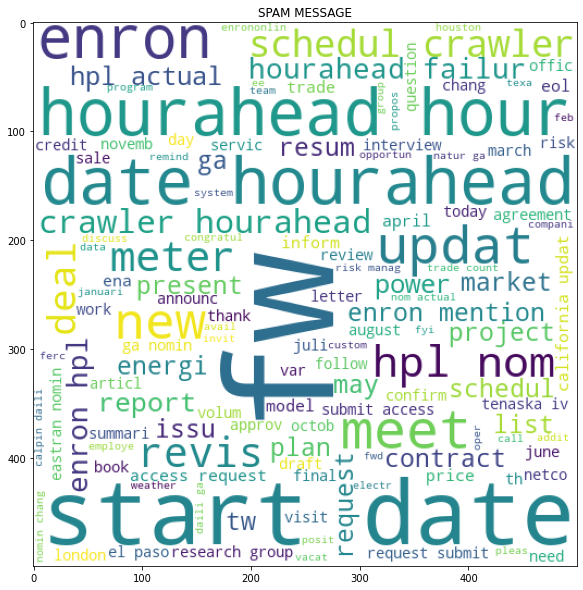

In [105]:
plt.figure(figsize=(10,10))
plt.title("SPAM MESSAGE")
plt.imshow(spam_msg)

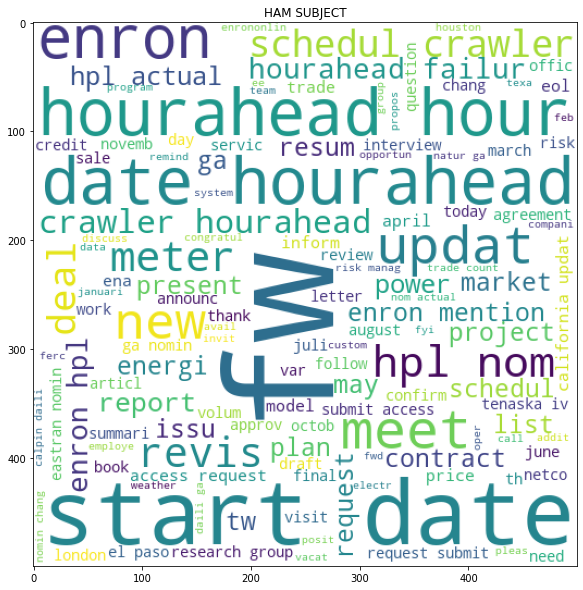

In [104]:
plt.figure(figsize=(10,10))
plt.title("HAM SUBJECT")
plt.imshow(ham_sub)

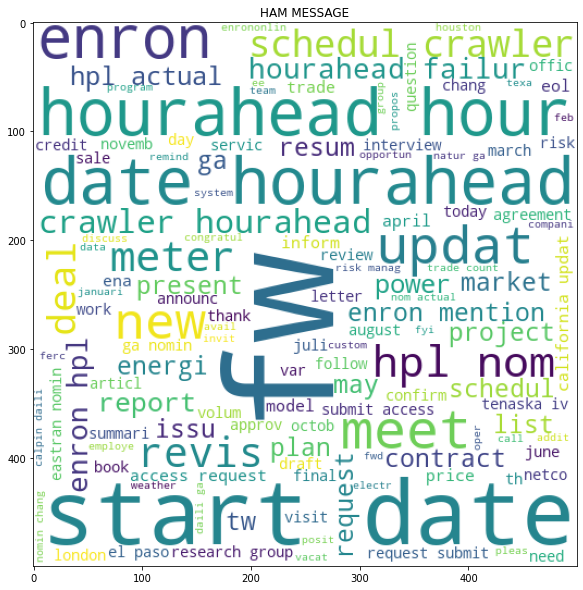

In [106]:
plt.figure(figsize=(10,10))
plt.title("HAM MESSAGE")
plt.imshow(ham_msg)